# Stackoverflow survey data


### Data Analysis Process
1. Business Understanding to define Problem statement.
1.  Data Understanding.
2.  Prepare Data.
3.  Data Modeling.
4.  Evaluate the Results
5.  Deploy.

## Business Understanding to define Problem statement.

***I want to setup software development business worldwide and hire developer from respective country. in that process I want to learn about technologies used by developers in software development. which country and tools I have to target based on satisfaction level of developer and lastly How much I have to pay for respective developer from respective countries ***


### Problem Statement Includes 
- Which are the Most popular software development scenarios used by developers in year 2019 in different countries  ?
- Job satisfaction ratio and career satisfaction with different coding languages in different countries ?
- How education influence on the salary ?

## Dataset and Data Understanding Solution Progress

### Header for import

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
import collections
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
from plotnine import *
from feature_selector import FeatureSelector

### Data import from Developer Survey

In [2]:
df_2019 = pd.read_csv(r'.\data\developer_survey_2019\survey_results_public.csv')

In [3]:
df_2018 = pd.read_csv(r'.\data\developer_survey_2018\survey_results_public.csv',low_memory=False)

In [4]:
df_2017 = pd.read_csv(r'.\data\developer_survey_2017\survey_results_public.csv',low_memory=False)

In [5]:
df_2019_schema  = pd.read_csv(r'.\data\developer_survey_2019\survey_results_schema.csv')

In [6]:
df_2018_schema  = pd.read_csv(r'.\data\developer_survey_2018\survey_results_schema.csv')

In [7]:
df_2017_schema  = pd.read_csv(r'.\data\developer_survey_2017\survey_results_schema.csv')

### Data Understanding and Presentation 

In [8]:
df_2019.head(2)

Respondent                              MainBranch Hobbyist              OpenSourcer                                         OpenSource                              Employment                 Country         Student                                            EdLevel UndergradMajor                                           EduOther OrgSize                                            DevType YearsCode Age1stCode YearsCodePro CareerSat JobSat MgrIdiot MgrMoney MgrWant                          JobSeek          LastHireDate LastInt FizzBuzz                                         JobFactors                                       ResumeUpdate CurrencySymbol CurrencyDesc  CompTotal CompFreq  ConvertedComp  WorkWeekHrs WorkPlan WorkChallenge WorkRemote WorkLoc ImpSyn CodeRev  CodeRevHrs UnitTests PurchaseHow PurchaseWhat               LanguageWorkedWith                           LanguageDesireNextYear DatabaseWorkedWith DatabaseDesireNextYear PlatformWorkedWith   PlatformDesireNextYear  \
0           1  I am a student who is learning to code      Yes                    Never  The quality of OSS and closed source software ...  Not employed, and not looking for work          United Kingdom              No                          Primary/elementary school            NaN  Taught yourself a new language, framework, or ...     NaN                                                NaN         4         10          NaN       NaN    NaN      NaN      NaN     NaN                              NaN                   NaN     NaN      NaN                                                NaN                                                NaN            NaN          NaN        NaN      NaN            NaN          NaN      NaN           NaN        NaN     NaN    NaN     NaN         NaN       NaN         NaN          NaN  HTML/CSS;Java;JavaScript;Python  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL             SQLite                  MySQL      MacOS;Windows  Android;Arduino;Windows   
1           2  I am a student who is learning to code       No  Less than once per year  The quality of OSS and closed source software ...      Not employed, but looking for work  Bosnia and Herzegovina  Yes, full-time  Secondary school (e.g. American high school, G...            NaN  Taken an online course in programming or softw...     NaN  Developer, desktop or enterprise applications;...       NaN         17          NaN       NaN    NaN      NaN      NaN     NaN  I am actively looking for a job  I've never had a job     NaN      NaN  Financial performance or funding status of the...  Something else changed (education, award, medi...            NaN          NaN        NaN      NaN            NaN          NaN      NaN           NaN        NaN     NaN    NaN     NaN         NaN       NaN         NaN          NaN              C++;HTML/CSS;Python                      C++;HTML/CSS;JavaScript;SQL                NaN                  MySQL            Windows                  Windows   

  WebFrameWorkedWith WebFrameDesireNextYear MiscTechWorkedWith MiscTechDesireNextYear                  DevEnviron    OpSys               Containers BlockchainOrg                                       BlockchainIs BetterLife                                  ITperson OffOn SocialMedia Extraversion ScreenName SOVisit1st                      SOVisitFreq                                          SOVisitTo        SOFindAnswer                     SOTimeSaved  SOHowMuchTime SOAccount                       SOPartFreq                                             SOJobs                             EntTeams         SOComm                            WelcomeChange                                       SONewContent   Age Gender Trans                Sexuality Ethnicity Dependents           SurveyLength                  SurveyEase  
0       Django;Flask           Flask;jQuery            Node.js                Node.js  IntelliJ;Notepad++;PyCharm  Windows  I do not use containers           NaN                        

In [9]:
# df_2018.head(2)

In [10]:
# df_2017.head(2)

In [11]:
for col in df_2019.columns:
    print(col) 

Respondent
MainBranch
Hobbyist
OpenSourcer
OpenSource
Employment
Country
Student
EdLevel
UndergradMajor
EduOther
OrgSize
DevType
YearsCode
Age1stCode
YearsCodePro
CareerSat
JobSat
MgrIdiot
MgrMoney
MgrWant
JobSeek
LastHireDate
LastInt
FizzBuzz
JobFactors
ResumeUpdate
CurrencySymbol
CurrencyDesc
CompTotal
CompFreq
ConvertedComp
WorkWeekHrs
WorkPlan
WorkChallenge
WorkRemote
WorkLoc
ImpSyn
CodeRev
CodeRevHrs
UnitTests
PurchaseHow
PurchaseWhat
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
OpSys
Containers
BlockchainOrg
BlockchainIs
BetterLife
ITperson
OffOn
SocialMedia
Extraversion
ScreenName
SOVisit1st
SOVisitFreq
SOVisitTo
SOFindAnswer
SOTimeSaved
SOHowMuchTime
SOAccount
SOPartFreq
SOJobs
EntTeams
SOComm
WelcomeChange
SONewContent
Age
Gender
Trans
Sexuality
Ethnicity
Dependents
SurveyLength
SurveyEase


In [12]:
for col in df_2017.columns:
    print(col) 

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

### Selecting last year for analysis 

In [13]:
df_country_count = df_2019.groupby(['Country'])['Respondent'].count().sort_values(ascending=False)
df_country_count

Country
United States                                20949
India                                         9061
Germany                                       5866
United Kingdom                                5737
Canada                                        3395
France                                        2391
Brazil                                        1948
Poland                                        1922
Australia                                     1903
Netherlands                                   1852
Russian Federation                            1694
Spain                                         1604
Italy                                         1576
Sweden                                        1274
Switzerland                                    978
Israel                                         952
Turkey                                         949
Pakistan                                       923
Ukraine                                        868
Austria                

In [14]:
df_country_list = [
'United Kingdom', 'United States', 'Canada', 'India', 'Germany', 'Australia', 'Russian Federation', 'Brazil', 'Spain', 'France', 'Netherlands'
]

In [15]:
# Attributes list
target_attributes = [
    # Background
    'Country',
    'YearsCode',
    'DevType',
    'YearsCodePro',
    'CareerSat',
    'Gender',
    # Technologies
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'DatabaseWorkedWith',
    'DatabaseDesireNextYear',
    'PlatformWorkedWith',
    'PlatformDesireNextYear',
    'OpSys',
    'Sexuality',
    'DevType'
]

## Most popular software development scenarios used by developers in year 2019 in different countries ?

### Prepare Data 

### filter by countries

In [16]:
df_2019_top = df_2019[df_2019.Country.isin(df_country_list)] # filter by countries
df_2019_top

Respondent                                         MainBranch Hobbyist                                        OpenSourcer                                         OpenSource                                         Employment             Country         Student                                            EdLevel                                     UndergradMajor                                           EduOther                                            OrgSize                                            DevType           YearsCode            Age1stCode        YearsCodePro                           CareerSat                              JobSat                MgrIdiot  MgrMoney                 MgrWant                                            JobSeek                                       LastHireDate                                            LastInt FizzBuzz                                         JobFactors                                       ResumeUpdate CurrencySymbol  \
0               1             I am a student who is learning to code      Yes                                              Never  The quality of OSS and closed source software ...             Not employed, and not looking for work      United Kingdom              No                          Primary/elementary school                                                NaN  Taught yourself a new language, framework, or ...                                                NaN                                                NaN                   4                    10                 NaN                                 NaN                                 NaN                     NaN       NaN                     NaN                                                NaN                                                NaN                                                NaN      NaN                                                NaN                                                NaN            NaN   
3               4                     I am a developer by profession       No                                              Never  The quality of OSS and closed source software ...                                 Employed full-time       United States              No           Bachelor’s degree (BA, BS, B.Eng., etc.)  Computer science, computer engineering, or sof...  Taken an online course in programming or softw...                               100 to 499 employees                              Developer, full-stack                   3                    16    Less than 1 year                      Very satisfied                  Slightly satisfied          Very confident        No                Not sure       I am not interested in new job opportunities                               Less than a year ago  Write code by hand (e.g., on a whiteboard);Int...       No  Languages, frameworks, and other technologies ...                   I was preparing for a job search            USD   
5               6  I am not primarily a developer, but I write co...      Yes                                              Never  The quality of OSS and closed source software ...                                 Employed full-time              Canada              No           Bachelor’s degree (BA, BS, B.Eng., etc.)                          Mathematics or statistics  Taken an online course in programming or softw...                                                NaN  Data or business analyst;Data scientist or mac...                  13                    15                   3                      Very satisfied                  Slightly satisfied          Very confident        No                     Yes       I am not interested in new job opportunities                                      1-2 years ago  Write any code;Complete a take-home project;In...       No  Financial performance or funding status of the...  I heard about a job opportunity (from a recrui...            CAD   
7               8      

### filter by attributes

In [17]:
df_2019_top_filterd = df_2019_top[target_attributes] # filter by attributes
df_2019_top_filterd.head()

Country YearsCode                                            DevType      YearsCodePro              CareerSat Gender                                 LanguageWorkedWith                             LanguageDesireNextYear                                 DatabaseWorkedWith                             DatabaseDesireNextYear                           PlatformWorkedWith                             PlatformDesireNextYear        OpSys                Sexuality                                            DevType
0  United Kingdom         4                                                NaN               NaN                    NaN    Man                    HTML/CSS;Java;JavaScript;Python    C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL                                             SQLite                                              MySQL                                MacOS;Windows                            Android;Arduino;Windows      Windows  Straight / Heterosexual                                                NaN
3   United States         3                              Developer, full-stack  Less than 1 year         Very satisfied    Man                                C;C++;C#;Python;SQL                                C;C#;JavaScript;SQL                                       MySQL;SQLite                                       MySQL;SQLite                                Linux;Windows                                      Linux;Windows      Windows  Straight / Heterosexual                              Developer, full-stack
5          Canada        13  Data or business analyst;Data scientist or mac...                 3         Very satisfied    Man                                         Java;R;SQL                                   Python;Scala;SQL                                 MongoDB;PostgreSQL                                         PostgreSQL  Android;Google Cloud Platform;Linux;Windows        Android;Google Cloud Platform;Linux;Windows      Windows  Straight / Heterosexual  Data or business analyst;Data scientist or mac...
7           India         8     Developer, back-end;Engineer, site reliability               NaN                    NaN    Man  Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...  Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...  Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...  Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...          AWS;Docker;Heroku;Linux;MacOS;Slack  Android;Arduino;AWS;Docker;Google Cloud Platfo...  Linux-based  Straight / Heterosexual     Developer, back-end;Engineer, site reliability
9           India        12  Data or business analyst;Data scientist or mac...                10  Slightly dissatisfied    NaN                      C#;Go;JavaScript;Python;R;SQL               C#;Go;JavaScript;Kotlin;Python;R;SQL  Elasticsearch;MongoDB;Microsoft SQL Server;MyS...         Elasticsearch;MongoDB;Microsoft SQL Server                                Linux;Windows                 Android;Linux;Raspberry Pi;Windows      Windows                      NaN  Data or business analyst;Data scientist or mac...

In [18]:
df_2019_top_filterd[['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith' ]].sample(10)

LanguageWorkedWith                      DatabaseWorkedWith                        PlatformWorkedWith
72087                   Bash/Shell/PowerShell;Python;SQL                                     NaN                 AWS;Linux;Microsoft Azure
49821  Bash/Shell/PowerShell;C;Clojure;Elixir;Go;Java...                        PostgreSQL;Redis  AWS;Docker;Heroku;Kubernetes;MacOS;Slack
13702                                            SQL;VBA                                     NaN                                   Windows
77414                         C#;HTML/CSS;JavaScript;SQL            MongoDB;Microsoft SQL Server                                   Windows
26913         Bash/Shell/PowerShell;C++;Python;R;SQL;VBA                                   MySQL       Google Cloud Platform;Linux;Windows
19338                              C#;F#;Java;JavaScript                                     NaN                     Android;MacOS;Windows
66415                 HTML/CSS;JavaScript;PHP;Python;SQL  MariaDB;MongoDB;MySQL;PostgreSQL;Redis                 Linux;WordPress;Other(s):
73743                                  Java;Python;R;SQL              Microsoft SQL Server;MySQL           AWS;Docker;Heroku;Linux;Windows
64761                                       HTML/CSS;PHP                                     NaN                                   Windows
83682          Bash/Shell/PowerShell;C;C++;Java;Python;R                           Elasticsearch            Android;AWS;Linux;Raspberry Pi

In [19]:
df_2019_top_filterd[['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith']].isnull().mean()

LanguageWorkedWith    0.010727
DatabaseWorkedWith    0.148457
PlatformWorkedWith    0.091454
dtype: float64

In [20]:
# Count the technology usage in each country, return a nested dictionary 
# in the form: {countyname: {tech1: count1, tech2: count2, ....}, .......}
def getStatistics(df, tech):
    """ Given the dataframe, counting the technology usage for each country
    
    Args:
        df: dataframe
        tech: Language, Database, Platform, or Framework
    
    Returns:
        A dictionary containing the technology usage for each country
        
    """
    statistics = {}
    WorkedWith = tech + 'WorkedWith'
    for index, row in df[['Country', WorkedWith]].iterrows():
        # add countries to the list if not exists
        if row['Country'] not in statistics:
            statistics[row['Country']] = {}
        # Technology count
        if row[WorkedWith] is not np.nan:
            for tar in row[WorkedWith].split(';'):
                statistics[row['Country']][tar] = statistics[row['Country']].get(tar, 0) + 1 

    return statistics

In [21]:
# Counting the tech usage
language_statistics = getStatistics(df_2019_top_filterd, 'Language')
platform_statistics = getStatistics(df_2019_top_filterd, 'Platform')
database_statistics = getStatistics(df_2019_top_filterd, 'Database')

In [22]:
# keys: the countries 
language_statistics.keys()

dict_keys(['United Kingdom', 'United States', 'Canada', 'India', 'Germany', 'Australia', 'Russian Federation', 'Brazil', 'Spain', 'France', 'Netherlands'])

In [23]:
# values: the technology counts
language_statistics['Germany'] # for the US

{'C++': 1533,
 'Java': 2761,
 'Kotlin': 493,
 'Python': 2451,
 'Bash/Shell/PowerShell': 2437,
 'C#': 1600,
 'HTML/CSS': 3446,
 'JavaScript': 3577,
 'SQL': 2920,
 'TypeScript': 1299,
 'WebAssembly': 71,
 'Clojure': 79,
 'Go': 539,
 'R': 313,
 'PHP': 1603,
 'C': 1229,
 'VBA': 365,
 'Ruby': 410,
 'Swift': 363,
 'Other(s):': 680,
 'Objective-C': 253,
 'Rust': 295,
 'Dart': 125,
 'Assembly': 407,
 'Erlang': 42,
 'F#': 55,
 'Scala': 278,
 'Elixir': 76}

Now we have technology usage counts.
Next, I will calculate the percentage and turn the data into a pandas dataframe for visualization.

The NaNs (missing values) is this calcuation will mean that there are no usage in the specific technoloy. I will fill NaN values with 0.

In [24]:
# Utility function
# Return a dataframe of relative usage of technologies among the selected countries
def dfWithRelativePreference(statistics, countries):
    """Given the technology usage dictionary, return a dataframe that display
       the relative usage of technologies compared to the entire dataset
       
       Args:
            statistics: statistic object calculated by getStatistics function
            countries: countries to be display and visualized
            
       Returns:
            relative usage percentage dataframe
            
    """
    df = pd.DataFrame(statistics)
    
    df['total_along_row']  = df.sum(axis=1)
    
    df = (df/df.sum()*100).fillna(0) # normalize and fill NaN
    
    df = df[countries+['total_along_row']]
    
    for country in countries:
        df[country] = df[country] - df['total_along_row']
    return df.drop(['total_along_row'], axis=1)

### Result

In [25]:
# Create and display language dataframe with colored bar
df_lang = dfWithRelativePreference(language_statistics,df_country_list)
df_lang.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

In [26]:
# Create and display language dataframe with colored bar
df_lang = dfWithRelativePreference(platform_statistics, df_country_list)
df_lang.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

In [27]:
# Create and display language dataframe with colored bar
df_lang = dfWithRelativePreference(database_statistics, df_country_list)
df_lang.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

### Conclusion

*** Insight: The relative popularity of frameworks ***
- Framework prevalence seems to have correlation with programming languages.
- A substantial more portion of Singapore developers use Big data tools such as Hadoop and Spark.
- Developers in China, Japan, and Taiwan seem to focus on AI applications or algorithms based on the Tensorflow usage.

## What is the job satisfaction ratio and career satisfaction with different coding languages  in different countries ?

### Data Understanding

In [28]:
df_2019.head(2)

Respondent                              MainBranch Hobbyist              OpenSourcer                                         OpenSource                              Employment                 Country         Student                                            EdLevel UndergradMajor                                           EduOther OrgSize                                            DevType YearsCode Age1stCode YearsCodePro CareerSat JobSat MgrIdiot MgrMoney MgrWant                          JobSeek          LastHireDate LastInt FizzBuzz                                         JobFactors                                       ResumeUpdate CurrencySymbol CurrencyDesc  CompTotal CompFreq  ConvertedComp  WorkWeekHrs WorkPlan WorkChallenge WorkRemote WorkLoc ImpSyn CodeRev  CodeRevHrs UnitTests PurchaseHow PurchaseWhat               LanguageWorkedWith                           LanguageDesireNextYear DatabaseWorkedWith DatabaseDesireNextYear PlatformWorkedWith   PlatformDesireNextYear  \
0           1  I am a student who is learning to code      Yes                    Never  The quality of OSS and closed source software ...  Not employed, and not looking for work          United Kingdom              No                          Primary/elementary school            NaN  Taught yourself a new language, framework, or ...     NaN                                                NaN         4         10          NaN       NaN    NaN      NaN      NaN     NaN                              NaN                   NaN     NaN      NaN                                                NaN                                                NaN            NaN          NaN        NaN      NaN            NaN          NaN      NaN           NaN        NaN     NaN    NaN     NaN         NaN       NaN         NaN          NaN  HTML/CSS;Java;JavaScript;Python  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL             SQLite                  MySQL      MacOS;Windows  Android;Arduino;Windows   
1           2  I am a student who is learning to code       No  Less than once per year  The quality of OSS and closed source software ...      Not employed, but looking for work  Bosnia and Herzegovina  Yes, full-time  Secondary school (e.g. American high school, G...            NaN  Taken an online course in programming or softw...     NaN  Developer, desktop or enterprise applications;...       NaN         17          NaN       NaN    NaN      NaN      NaN     NaN  I am actively looking for a job  I've never had a job     NaN      NaN  Financial performance or funding status of the...  Something else changed (education, award, medi...            NaN          NaN        NaN      NaN            NaN          NaN      NaN           NaN        NaN     NaN    NaN     NaN         NaN       NaN         NaN          NaN              C++;HTML/CSS;Python                      C++;HTML/CSS;JavaScript;SQL                NaN                  MySQL            Windows                  Windows   

  WebFrameWorkedWith WebFrameDesireNextYear MiscTechWorkedWith MiscTechDesireNextYear                  DevEnviron    OpSys               Containers BlockchainOrg                                       BlockchainIs BetterLife                                  ITperson OffOn SocialMedia Extraversion ScreenName SOVisit1st                      SOVisitFreq                                          SOVisitTo        SOFindAnswer                     SOTimeSaved  SOHowMuchTime SOAccount                       SOPartFreq                                             SOJobs                             EntTeams         SOComm                            WelcomeChange                                       SONewContent   Age Gender Trans                Sexuality Ethnicity Dependents           SurveyLength                  SurveyEase  
0       Django;Flask           Flask;jQuery            Node.js                Node.js  IntelliJ;Notepad++;PyCharm  Windows  I do not use containers           NaN                        

### Prepare Data

In [29]:
df_2019_satisfaction = df_2019[['CareerSat', 'JobSat', 'Employment', 'LanguageWorkedWith' , 'Country']]

In [30]:
df_2019_satisfaction = df_2019_satisfaction[df_2019_satisfaction.Employment == "Employed full-time"]
df_2019_satisfaction = df_2019_satisfaction.dropna(axis=0)
df_2019_satisfaction['LanguageWorkedWith'] = df_2019_satisfaction['LanguageWorkedWith'].fillna('missing')
df_2019_satisfaction.head()  
df_2019_satisfaction.count()

CareerSat             60706
JobSat                60706
Employment            60706
LanguageWorkedWith    60706
Country               60706
dtype: int64

In [31]:
print(60706/88883)

0.6829877479383009


0.6829877479383009

Interestingly, there are about 60706 responses for 88883 total people. So about 28177 are either not employed full time or did not answer. I think we still have a significant amount to determine an well represented answer. Only about 1/4 of the data is missing and being employed full time means they are serious about coding, are fully committed and act professional. Other factors and distractions could influence happiness, i.e. people not full time can take a break or enjoy other activities.

In [32]:
df_2019_satisfaction_country = df_2019_satisfaction[df_2019_satisfaction.Country.isin(df_country_list)]

In [33]:
df_2019_satisfaction_country

CareerSat                              JobSat          Employment                                 LanguageWorkedWith             Country
3                          Very satisfied                  Slightly satisfied  Employed full-time                                C;C++;C#;Python;SQL       United States
5                          Very satisfied                  Slightly satisfied  Employed full-time                                         Java;R;SQL              Canada
9                   Slightly dissatisfied               Slightly dissatisfied  Employed full-time                      C#;Go;JavaScript;Python;R;SQL               India
12                         Very satisfied                      Very satisfied  Employed full-time  Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...       United States
13                         Very satisfied                      Very satisfied  Employed full-time                                                C++             Germany
15                         Very satisfied                  Slightly satisfied  Employed full-time  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...      United Kingdom
16                     Slightly satisfied  Neither satisfied nor dissatisfied  Employed full-time  Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...           Australia
17                     Slightly satisfied                      Very satisfied  Employed full-time                                           Python;R  Russian Federation
18                      Very dissatisfied                      Very satisfied  Employed full-time         C#;HTML/CSS;Java;JavaScript;SQL;TypeScript              Brazil
21                     Slightly satisfied                   Very dissatisfied  Employed full-time  Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...       United States
22                     Slightly satisfied                  Slightly satisfied  Employed full-time  Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...       United States
25                         Very satisfied                      Very satisfied  Employed full-time  Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...       United States
28                         Very satisfied                  Slightly satisfied  Employed full-time               Bash/Shell/PowerShell;JavaScript;SQL       United States
31                     Slightly satisfied                  Slightly satisfied  Employed full-time  Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...       United States
34                     Slightly satisfied                   Very dissatisfied  Employed full-time                                HTML/CSS;JavaScript       United States
35                         Very satisfied                      Very satisfied  Employed full-time                                 Java;Kotlin;Python             Germany
38                         Very satisfied                      Very satisfied  Employed full-time                       C#;JavaScript;SQL;TypeScript       United States
42                      Very dissatisfied               Slightly dissatisfied  Employed full-time    C++;C#;HTML/CSS;Java;JavaScript;Objective-C;SQL               Spain
43                     Slightly satisfied  Neither satisfied nor dissatisfied  Employed full-time  Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...             Germany
44                     Slightly satisfied                  Slightly satisfied  Employed full-time                                             Python       United States
46                         Very satisfied                      Very satisfied  Employed full-time                                      Java;PHP;Ruby       United States
49                     Slightly satisfied                      Very satisfied  Employed full-time  Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...               India
52                     Slightly satisfied                  Slightly satisfied  Employed full-time  Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript

In [34]:
# Count the technology usage in each country, return a nested dictionary 
# in the form: {countyname: {tech1: count1, tech2: count2, ....}, .......}
def getSatisfactionStatistics(df):
    """ Given the dataframe, counting the technology usage for each country
    
    Args:
        df: dataframe
        tech: Language, Database, Platform, or Framework
    
    Returns:
        A dictionary containing the technology usage for each country
        
    """
    statistics = {}
    JobSat='JobSat'
    for index, row in df[['Country', JobSat]].iterrows():
        # add countries to the list if not exists
        if row['Country'] not in statistics:
            statistics[row['Country']] = {}
        # Technology count
        if row[JobSat] is not np.nan:
            for tar in row[JobSat].split(';'):
                statistics[row['Country']][tar] = statistics[row['Country']].get(tar, 0) + 1 

    return statistics

In [35]:
Satisfaction_statistics = getSatisfactionStatistics(df_2019_satisfaction_country)

In [36]:
df_sat = dfWithRelativePreference(Satisfaction_statistics,df_country_list)
df_sat.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

In [37]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
#q2['LanguageWorkedWith'] = q2['LanguageWorkedWith'].fillna('missing')
split_list_jobsat = split_column(df_2019_satisfaction, 'JobSat')
split_list_jobsat

2                        [Slightly satisfied]
3                        [Slightly satisfied]
4                     [Slightly dissatisfied]
5                        [Slightly satisfied]
8                        [Slightly satisfied]
9                     [Slightly dissatisfied]
12                           [Very satisfied]
13                           [Very satisfied]
15                       [Slightly satisfied]
16       [Neither satisfied nor dissatisfied]
17                           [Very satisfied]
18                           [Very satisfied]
19                    [Slightly dissatisfied]
21                        [Very dissatisfied]
22                       [Slightly satisfied]
23                           [Very satisfied]
24                           [Very satisfied]
25                           [Very satisfied]
27                           [Very satisfied]
28                       [Slightly satisfied]
31                       [Slightly satisfied]
32                           [Very

In [38]:
# again place data into a array that will then be transformed into a dictionary
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
    for elem in df_2019_satisfaction['JobSat']:
        objects.append(elem)
    return objects

# Flatting nested list objects.
list_worked_languages = disarray(split_list_jobsat)
# list_worked_languages

In [39]:
def group_list(data_list):
    ''' Group by count to a list,
        returns a result dict only for JobSat.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'JobSat':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

    
# Groping a list and creating a dict.
dict_worked_languages = group_list(list_worked_languages)
dict_worked_languages

[{'JobSat': 'Slightly satisfied', 'Count': 41902},
 {'JobSat': 'Slightly dissatisfied', 'Count': 18664},
 {'JobSat': 'Very satisfied', 'Count': 38286},
 {'JobSat': 'Neither satisfied nor dissatisfied', 'Count': 14296},
 {'JobSat': 'Very dissatisfied', 'Count': 8264}]

In [40]:
def create_dataframe(data_dicts): #column1, column2):
    ''' Input a dictionary list
        returns a pandas dataframe
    '''
    
    
    df1 = pd.DataFrame.from_dict(data_dicts)


    
    return df1

# Creating a Data Frame appending the data.
worked_jobsat = create_dataframe(dict_worked_languages)
worked_jobsat

Count                              JobSat
0  41902                  Slightly satisfied
1  18664               Slightly dissatisfied
2  38286                      Very satisfied
3  14296  Neither satisfied nor dissatisfied
4   8264                   Very dissatisfied

In [41]:
# Get job Satisfaction Categies Counted
top_5_job_sat = worked_jobsat.sort_values(by=['Count'], ascending=False).head(10)['JobSat'].unique()


jobsat_chart = worked_jobsat[worked_jobsat['JobSat'].isin(top_5_job_sat)]
jobsat_chart

Count                              JobSat
0  41902                  Slightly satisfied
1  18664               Slightly dissatisfied
2  38286                      Very satisfied
3  14296  Neither satisfied nor dissatisfied
4   8264                   Very dissatisfied

 ### Data Modeling

No handles with labels found to put in legend.


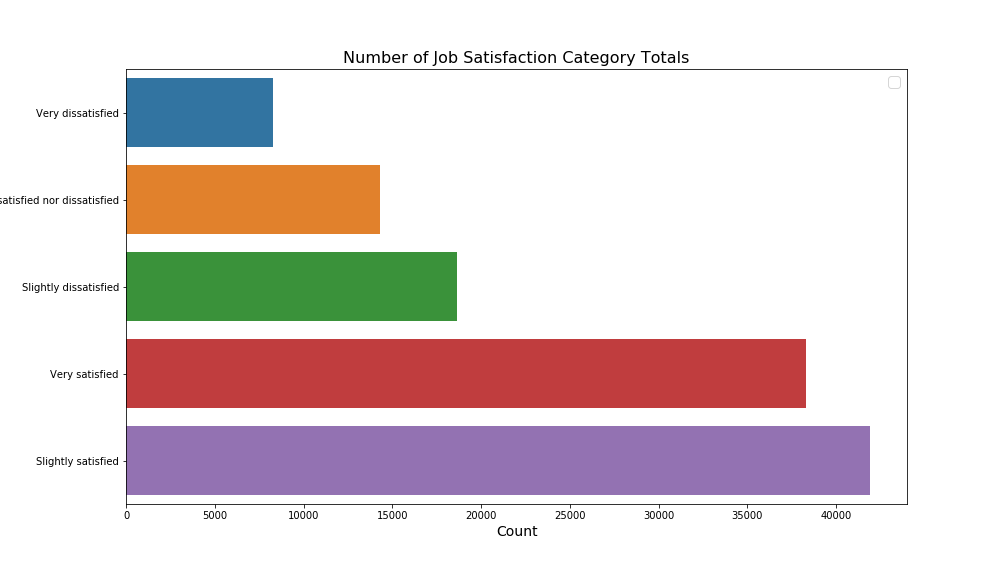

In [42]:
# Figure 3 — Number of Job Satisfaction Category Totals 
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'JobSat',
            data = jobsat_chart.sort_values(by='Count'))
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Job Satisfation Type", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Number of Job Satisfaction Category Totals', size = 16)
plt.show()

In [43]:
# Get the top 5 job Satisfaction Categies Counted
top_5_job_sat = worked_jobsat.sort_values(by=['Count'], ascending=False).head(10)['JobSat'].unique()

jobsat_chart = worked_jobsat[worked_jobsat['JobSat'].isin(top_5_job_sat)]
jobsat_chart

Count                              JobSat
0  41902                  Slightly satisfied
1  18664               Slightly dissatisfied
2  38286                      Very satisfied
3  14296  Neither satisfied nor dissatisfied
4   8264                   Very dissatisfied

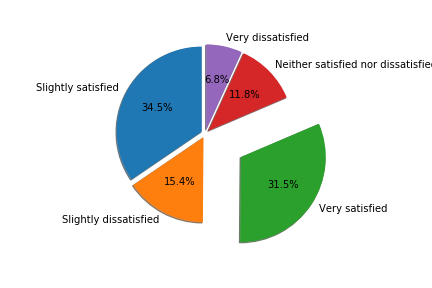

In [44]:
explode = (0.1, 0.1, 1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(jobsat_chart.Count, explode=explode, labels=jobsat_chart.JobSat, autopct='%1.1f%%',
        shadow=True, startangle=90 , radius = 2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [45]:
### What is the job satisfaction with language (the code that is most in demand)?

## What's the pay for developers like?

In [46]:
df_2019_salaries = df_2019[['DevType', 'Country','ConvertedComp']]

for column in df_2019_salaries.columns.tolist():
    col_desc = df_2019_schema[df_2019_schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


### Schema Questions
- Which of the following describe you? Please select all that apply.
- In which country do you currently reside?
- Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.

In [47]:
# Lets check for missing values in salaries_df
df_2019_salaries.isnull().sum()

DevType           7548
Country            132
ConvertedComp    33060
dtype: int64

In [48]:
# salaries_df missing values in %
round((df_2019_salaries.isnull().sum()/df_2019_salaries.shape[0])*100,1)

DevType           8.5
Country           0.1
ConvertedComp    37.2
dtype: float64

Insight

it seems that a large number of developers do not reveal their salaries, and this could be due to privacy concerns.

To assess the pay for developers, we will make use of salaries distribution by country. This allows us to compare like with like.

In [49]:
# drop rows with missing values from salaries df
df_2019_salaries_clean = df_2019_salaries.dropna().reset_index()
df_2019_salaries_clean.head()

index                                            DevType        Country  ConvertedComp
0      2  Designer;Developer, back-end;Developer, front-...       Thailand         8820.0
1      3                              Developer, full-stack  United States        61000.0
2      5  Data or business analyst;Data scientist or mac...         Canada       366420.0
3      8  Database administrator;Developer, back-end;Dev...    New Zealand        95179.0
4      9  Data or business analyst;Data scientist or mac...          India        13293.0

In [50]:
df_2019_salaries_clean.Country.value_counts().reset_index()

index  Country
0                                United States    14756
1                               United Kingdom     3967
2                                        India     3953
3                                      Germany     3734
4                                       Canada     2225
5                                       France     1619
6                                       Brazil     1395
7                                       Poland     1307
8                                    Australia     1233
9                                        Spain     1189
10                                 Netherlands     1184
11                          Russian Federation     1095
12                                       Italy      932
13                                      Sweden      901
14                                 Switzerland      663
15                                      Israel      569
16                                     Ukraine      535
17                                     Austria      500
18                                      Turkey      496
19                              Czech Republic      477
20                                      Mexico      457
21                                     Belgium      456
22                                    Pakistan      421
23                                      Norway      415
24                                        Iran      415
25                                South Africa      414
26                                     Denmark      413
27                                     Romania      409
28                                    Bulgaria      401
29                                   Argentina      389
30                                     Finland      380
31                                 New Zealand      354
32                                    Portugal      353
33                                     Ireland      336
34                                     Hungary      324
35                                      Greece      304
36                                       Japan      253
37                                  Bangladesh      248
38                                       China      240
39                                      Serbia      218
40                                    Colombia      209
41                                   Indonesia      205
42                                    Slovenia      204
43                                     Nigeria      196
44                                     Croatia      167
45                                   Sri Lanka      163
46                                   Lithuania      160
47                                   Singapore      153
48                                 Philippines      149
49                                       Egypt      148
50                                    Slovakia      145
51                                       Chile      143
52                                     Estonia      141
53                                    Malaysia      136
54                                     Belarus      123
55                          Hong Kong (S.A.R.)      107
56                                      Taiwan      106
57                                    Thailand      102
58                                       Kenya       99
59                                      Latvia       98
60                                     Uruguay       91
61                        United Arab Emirates       87
62                                    Viet Nam       85
63                                       Nepal       83
64                                        Peru       80
65                                 South Korea       70
66                          Dominican Republic       67
67                                     Lebanon       67
68                      Bosnia and Herzegovina       59
69            Other Country (Not Listed Above)       59
70                                     Ecuador       56
71       

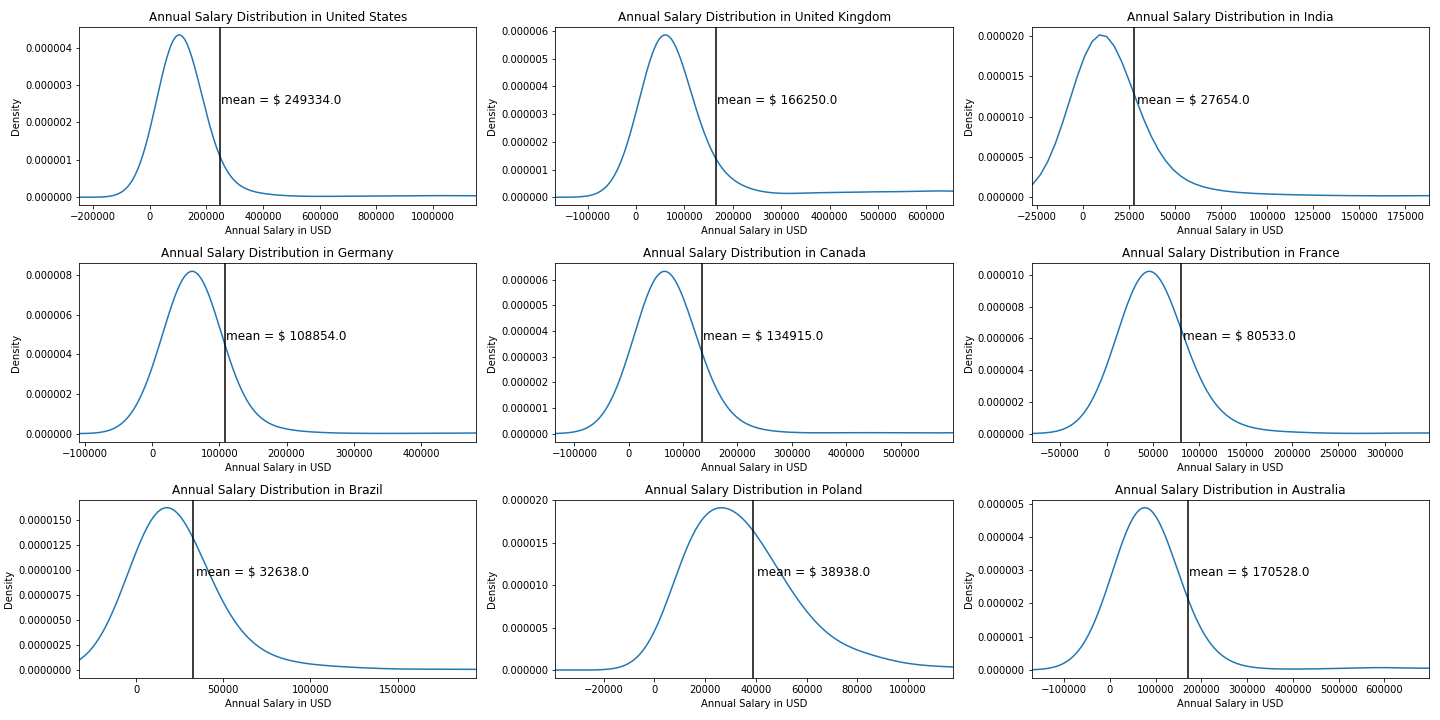

In [51]:
# now lets plot salary distributions for the top 20 countries

fig = plt.figure(figsize=(20,10))

countries = df_2019_salaries_clean['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = df_2019_salaries_clean.loc[df_2019_salaries_clean['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'black')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()